<a href="https://colab.research.google.com/github/harika5041/Student_Performance_Prediction_using_ANN/blob/main/Student_Performance_Analysis_Code/ann_cs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score #for evaluation metrics
from tensorflow import keras  #For building and training neural networks

In [ ]:
# Create synthetic dataset (example)
np.random.seed(0) # generating random numbers using numpy ,0-to genrate same numbers always
num_samples = 1000

# Features: study time, previous grades, etc.
study_time = np.random.uniform(1, 10, num_samples)#generates random values uniformly between 1 and 10 which indicates the study time
previous_grades = np.random.uniform(0, 100, num_samples)#generating random grades uniformly between 0 and 100
other_factors = np.random.randn(num_samples)  # generate random values from standard normal distribution represents

# Target: student performance (exam score)
noise = np.random.randn(num_samples) * 5  # Add some noise to make it more realistic
exam_score = 50 + (study_time * 3) + (previous_grades * 0.5) + (other_factors * 2) + noise

# Create DataFrame-each column represents a feature
df = pd.DataFrame({
    'StudyTime': study_time,
    'PreviousGrades': previous_grades,
    'OtherFactors': other_factors,
    'ExamScore': exam_score
})

# Select features (X) and target (y)
X = df[['StudyTime', 'PreviousGrades', 'OtherFactors']].values #extracts input features and convert then to numpy array
y = df['ExamScore'].values #extracting the target variable

# Split data into training and testing sets-20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler() # initializing StandardScaler object to standardize the feature
X_train_scaled = scaler.fit_transform(X_train) #fits the scaler to the training data and transforms it
X_test_scaled = scaler.transform(X_test) #transform the test data using same scaler


In [ ]:
#defining the model-keras.Sequential defines the linear stack of layers for nn
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
]) # Output layer (no activation function for regression)
#fully connexted 2 hidden layes,64 no of neurons,specifies the shape of input data

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') #mse loss function


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
#model.fit-train the neural network model,standardized input featurs,traget feature,5 iterations,20% of training data is used for validation

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 8845.7676 - val_loss: 8643.7910
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8739.0400 - val_loss: 8505.2451
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8422.3682 - val_loss: 8295.0947
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8242.9873 - val_loss: 7970.4741
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7711.1436 - val_loss: 7496.4141
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7256.8521 - val_loss: 6847.9819
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6577.6577 - val_loss: 6004.5708
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5571.9561 - val_loss: 4982.4326
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4552.4492 - val_loss: 3844.9434
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3553.1814 - val_loss: 2716.9607
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2498.4983 - val_loss: 1729.772

In [ ]:
# Evaluate the model on the test data
mse = model.evaluate(X_test_scaled, y_test, verbose=0)#computes the mse between model predictions and true values
print(f'Mean Squared Error on Test Data: {mse:.4f}')

# Make predictions
predictions = model.predict(X_test_scaled).flatten()#making predictions and reshape predictions into 1d aray

# Calculate R-squared between predicted values and true values(coefficient of determination)
r2 = r2_score(y_test, predictions)
print(f'R-squared on Test Data: {r2:.4f}')


Mean Squared Error on Test Data: 56.4523
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R-squared on Test Data: 0.8415


In [ ]:
# Example of classifying performance (you can adjust thresholds based on your criteria)
threshold_pass = 60  #  threshold score for passing

predicted_classes = np.where(predictions >= threshold_pass, 1, 0)#classify predicted scores
actual_classes = np.where(y_test >= threshold_pass, 1, 0)#classify actual exam scores

# Calculate accuracy
accuracy = np.mean(predicted_classes == actual_classes)#compares pc==ac to check where predictions are same as actual values
print(f'Accuracy: {accuracy:.4f}')

# You can compute other classification metrics (precision, recall, F1-score) using scikit-learn


Accuracy: 0.9650


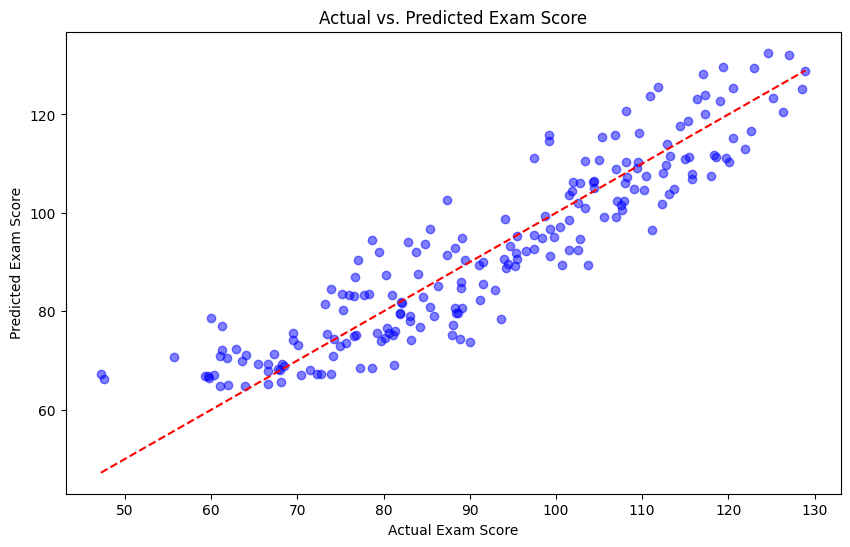

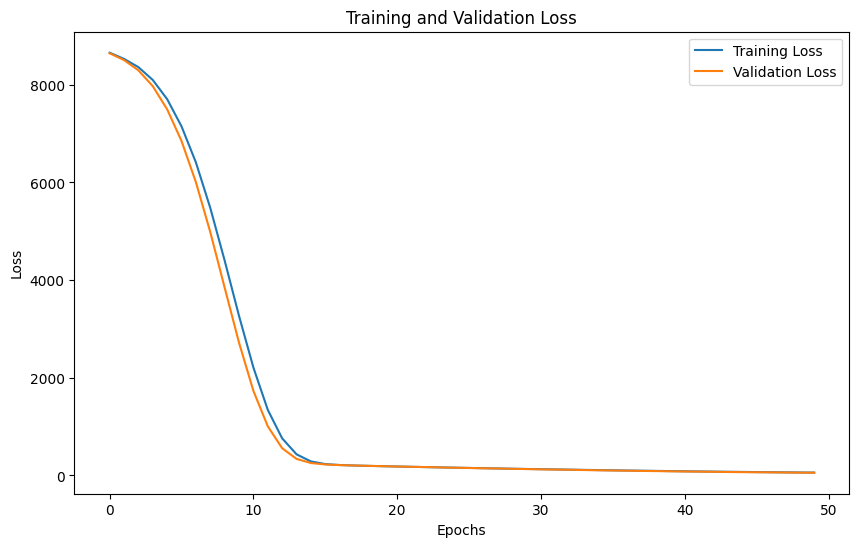

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))#craeting new figure for plot with size
plt.scatter(y_test, predictions, color='blue', alpha=0.5)#generate a scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')#adds diagobal dashed line rom min to max of y_test
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Score')
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')#plots the loss stored in history.history and specifying its label
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()#displays a legend on plot shows which line corresponds to which
plt.show()
